# Electric Field of a Distribution of Point Charges

Coulomb's Law:  

The force of test charge Q located at point P (at the position $\mathcal{r}$), coming from a single point charge $q_0$ located at $\mathcal{r}_0$ is given by:  

$$\mathrm{F_0} = k\dfrac{q_0 Q}{(r-r_0)^2}
\dfrac{r-r_0}{|r-r_0|}$$  

where Coulomb's constant is $k = \dfrac{1}{4\pi \epsilon_0}$ in SI units ($\epsilon_0$ is the permittivity of free space.)  
The force is proportional to the product of two charges, inversely proportional to the square of the distance between the two charges, and points along the line from charge $q_0$ to charge $Q$. The electric field is then the ratio of the forces $\mathrm{F_0}$ with the test charge $Q$ in the limit where the magnitude of the test charge goes to zero. In practice, this gives us:  

$$E_0(r)=kq_0\dfrac{r-r_0}{|r-r_0|^3}$$  

where we cancelled out the $Q$ and also took the opportunity to combine the two denominators. This is the electric field at the location of $r$ due to the point charge $q_0$ at $r_0$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(4,4)
plt.rcParams['figure.dpi']=72

In [20]:
def makefields(xs,ys):
    charge_positions = {-1:(-1,0),1:(1,0)}
    Exs = np.zeros((len(xs),len(xs)))
    Eys = np.zeros((len(xs),len(xs)))
    for j,x in enumerate(xs):
        for k,y in enumerate(ys):
            for q,pos in charge_positions.items():
                posx,posy = pos
                R = np.sqrt((x-posx)**2+(y-posy)**2)
                Exs[k][j]+=q*(x-posx)/R**3
                Eys[k][j]+=q*(y-posy)/R**3
    return Exs,Eys

In [21]:
def plotfield(boxl,n):
    xs = np.linspace(-boxl, boxl, n)
    ys = xs[:]
    Exs,Eys = makefields(xs,ys)
    plt.streamplot(xs,ys,Exs,Eys,density=4,color='k',linewidth=0.5)

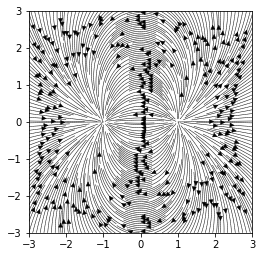

In [22]:
plotfield(3,100)

In [23]:
def makefields(xs,ys):
    charge_positions = {-1: (-1, 0), 1: (1, 0), -2: (0, -1), 2: (0, 1)}
    Exs = np.zeros((len(xs),len(xs)))
    Eys = np.zeros((len(xs),len(xs)))
    for j,x in enumerate(xs):
        for k,y in enumerate(ys):
            for q,pos in charge_positions.items():
                posx,posy = pos
                R = np.sqrt((x-posx)**2+(y-posy)**2)
                Exs[k][j]+=q*(x-posx)/R**3
                Eys[k][j]+=q*(y-posy)/R**3
    return Exs,Eys

In [24]:
def plotfield(boxl,n):
    xs = np.linspace(-boxl, boxl, n)
    ys = xs[:]
    Exs,Eys = makefields(xs,ys)
   
    plt.figure()
    plt.streamplot(xs,ys,Exs,Eys,density=2,color='k',linewidth=0.3)
    charge_positions = {-1: (-1, 0), 1: (1, 0), -2: (0, -1), 3: (0, 1)}
    charges = {-1:('o','r'), 1:('o','r'), -2:('o','r'), 3:('o','r')}
    for charge, params in charges.items():
        x, y = charge_positions[charge]
        marker,color = params
        plt.scatter(x, y, marker=marker, color=color, s=charge**2*100)
        plt.annotate(f"q = {charge}", xy=(x,y),xytext=(x+0.1,y+0.1),size=20)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Electric Field')
    plt.grid(True)
    plt.show()

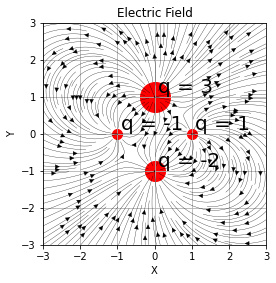

In [25]:
plotfield(3,100)

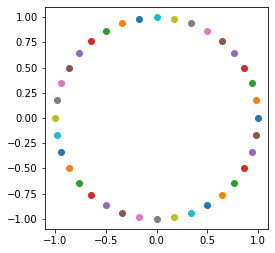

In [26]:
def generate_circle_points(q,num_points, radius):
    angles = np.linspace(0, 2*np.pi, num_points, endpoint=False)
    x_coords = radius * np.cos(angles)
    y_coords = radius * np.sin(angles)
    charges = {i: (x, y, q) for i, (x, y, q) in enumerate(zip(x_coords, y_coords,q), start=1)}
    return charges

# Example usage
num_points = 36
radius = 1.0
charges = generate_circle_points(np.ones(num_points), num_points, radius)
#print(qtopos)
for q,pos in charges.items():
    x,y,_ = pos
    plt.scatter(x,y)

In [27]:
def makefields(qcount,xs, ys):
    # charge : co-ordinates
    def generate_circle_points(q,num_points, radius):
        angles = np.linspace(0, 2*np.pi, num_points, endpoint=False)
        x_coords = radius * np.cos(angles)
        y_coords = radius * np.sin(angles)
        charges = {i: (x, y, q) for i, (x, y, q) in enumerate(zip(x_coords, y_coords, q), start=1)}
        return charges

    num_points = qcount
    radius = 1.0
    
    charges = generate_circle_points(-np.ones(num_points), num_points, radius)
    
    
    Exs = np.zeros((len(xs),len(xs)))
    Eys = np.zeros((len(xs),len(xs)))
    
    for j, x in enumerate(xs):
        for k, y in enumerate(ys):
            for q, params in charges.items():
                posx, posy, charge = params
                R = np.sqrt((x - posx)**2 + (y - posy)**2)
                Exs[k][j] += charge * (x - posx) / R**3
                Eys[k][j] += charge * (y - posy) / R**3
    return Exs, Eys, charges

def plotfield(boxl,qcount):
    xs = np.linspace(-boxl, boxl, 200)
    ys = xs[:]
    Exs, Eys, charges = makefields(qcount,xs,ys)
    
    plt.figure()
    plt.streamplot(xs,ys,Exs,Eys,density=2,color='k',linewidth=0.3)
   
    for q, params in charges.items():
        x, y, charge = params
        marker,color = 'o','k'
        plt.scatter(x, y, marker=marker, color=color, s=5)
        # plt.annotate(f"q = {charge}", xy=(x,y),xytext=(x+0.1,y+0.1),size=10)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Electric Field')
    plt.grid(True)
    plt.show()

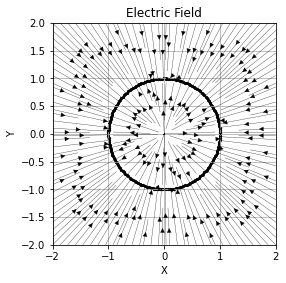

In [28]:
plotfield(2,180)

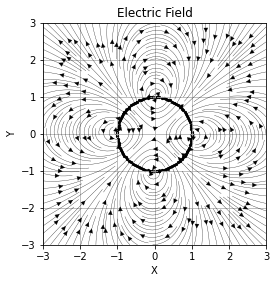

In [29]:
def generate_circle_points(q,num_points, radius):
    angles = np.linspace(0, 2*np.pi, num_points, endpoint=False)
    x_coords = radius * np.cos(angles)
    y_coords = radius * np.sin(angles)
    charges = {i: (x, y, q) for i, (x, y, q) in enumerate(zip(x_coords, y_coords, q), start=1)}
    return charges

def makefields(qcount,xs, ys):
    radius = 1.0
    # Top half charges in cicle -ve and bottom half +ve 
#     q = np.append(-np.ones(int(qcount/2)),np.ones(int(qcount/2)))
    q = np.append([-np.ones(int(qcount/4)),np.ones(int(qcount/4))],[-np.ones(int(qcount/4)),np.ones(int(qcount/4))])
    charges = generate_circle_points(q, qcount, radius)
    
    
    Exs = np.zeros((len(xs),len(xs)))
    Eys = np.zeros((len(xs),len(xs)))
    
    for j, x in enumerate(xs):
        for k, y in enumerate(ys):
            for q, params in charges.items():
                posx, posy, charge = params
                R = np.sqrt((x - posx)**2 + (y - posy)**2)
                Exs[k][j] += charge * (x - posx) / R**3
                Eys[k][j] += charge * (y - posy) / R**3
    return Exs, Eys, charges

def plotfield(boxl,qcount):
    xs = np.linspace(-boxl, boxl, 200)
    ys = xs[:]
    Exs, Eys, charges = makefields(qcount,xs,ys)
    
    plt.figure()
    plt.streamplot(xs,ys,Exs,Eys,density=2,color='k',linewidth=0.3)
   
    for q, params in charges.items():
        x, y, charge = params
        marker,color = 'o','k'
        plt.scatter(x, y, marker=marker, color=color, s=5)
        # plt.annotate(f"q = {charge}", xy=(x,y),xytext=(x+0.1,y+0.1),size=10)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Electric Field')
    plt.grid(True)
    plt.show()
    
plotfield(3,100)

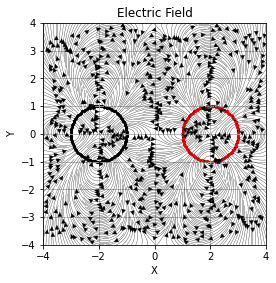

In [30]:
def generate_circle_points(q, num_points, radius, center):
    angles = np.linspace(0, 2*np.pi, num_points, endpoint=False)
    x_coords = radius * np.cos(angles) + center[0]
    y_coords = radius * np.sin(angles) + center[1]
    charges = {i: (x, y, q) for i, (x, y, q) in enumerate(zip(x_coords, y_coords, q), start=1)}
    return charges

def makefields(qcount, xs, ys, ring1_center, ring2_center, ring_radius, separation_distance):
    
    q = np.append([-np.ones(int(qcount/4)),np.ones(int(qcount/4))],[-np.ones(int(qcount/4)),np.ones(int(qcount/4))])
    # Generate charges for the first ring
    charges1 = generate_circle_points(q, qcount, ring_radius, ring1_center)
    
    # Generate charges for the second ring
    charges2 = generate_circle_points(q, qcount, ring_radius, ring2_center)

    Exs = np.zeros((len(xs), len(xs)))
    Eys = np.zeros((len(xs), len(xs)))

    for j, x in enumerate(xs):
        for k, y in enumerate(ys):
            for q, params in charges1.items():
                posx, posy, charge = params
                R = np.sqrt((x - posx)**2 + (y - posy)**2)
                Exs[k][j] += charge * (x - posx) / R**3
                Eys[k][j] += charge * (y - posy) / R**3
            
            for q, params in charges2.items():
                posx, posy, charge = params
                R = np.sqrt((x - posx)**2 + (y - posy)**2)
                Exs[k][j] += charge * (x - posx) / R**3
                Eys[k][j] += charge * (y - posy) / R**3

    return Exs, Eys, charges1, charges2

def plotfield(boxl, qcount, separation_distance):
    xs = np.linspace(-boxl, boxl, 200)
    ys = xs[:]

    ring_radius = 1.0
    ring1_center = (-2, 0)
    ring2_center = (separation_distance, 0)

    Exs, Eys, charges1, charges2 = makefields(qcount, xs, ys, ring1_center, ring2_center, ring_radius, separation_distance)

    plt.figure()
    plt.streamplot(xs, ys, Exs, Eys, density=5, color='k', linewidth=0.3)

    for q, params in charges1.items():
        x, y, charge = params
        marker, color = 'o', 'k'
        plt.scatter(x, y, marker=marker, color=color, s=5)

    for q, params in charges2.items():
        x, y, charge = params
        marker, color = 'o', 'r'
        plt.scatter(x, y, marker=marker, color=color, s=5)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Electric Field')
    plt.grid(True)
    plt.show()

plotfield(4, 100, 2)

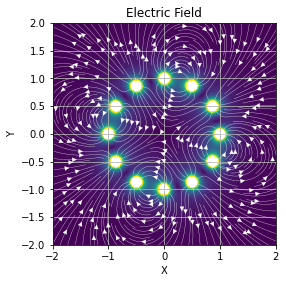

In [31]:
def generate_circle_points(q,num_points, radius):
    angles = np.linspace(0, 2*np.pi, num_points, endpoint=False)
    x_coords = radius * np.cos(angles)
    y_coords = radius * np.sin(angles)
    charges = {i: (x, y, q) for i, (x, y, q) in enumerate(zip(x_coords, y_coords, q), start=1)}
    return charges

def makefields(qcount,xs, ys):
    radius = 1.0
    # Top half charges in cicle -ve and bottom half +ve 
#     q = np.append(-np.ones(int(qcount/2)),np.ones(int(qcount/2)))
    q = np.append([-np.ones(int(qcount/4)),np.ones(int(qcount/4))],[-np.ones(int(qcount/4)),np.ones(int(qcount/4))])
    charges = generate_circle_points(q, qcount, radius)
    
    
    Exs = np.zeros((len(xs),len(xs)))
    Eys = np.zeros((len(xs),len(xs)))
    
    for j, x in enumerate(xs):
        for k, y in enumerate(ys):
            for q, params in charges.items():
                posx, posy, charge = params
                R = np.sqrt((x - posx)**2 + (y - posy)**2)
                Exs[k][j] += charge * (x - posx) / R**3
                Eys[k][j] += charge * (y - posy) / R**3
    return Exs, Eys, charges

def plotfield(boxl,qcount):
    xs = np.linspace(-boxl, boxl, 200)
    ys = xs
    Exs, Eys, charges = makefields(qcount,xs,ys)
    E = (Exs**2+Eys**2)**0.5
    plt.figure()
    plt.streamplot(xs,ys,Exs,Eys,density=2,color='white',linewidth=0.3)
    levels = np.linspace(0,100,1000)
    plt.contourf(xs,ys,E, levels=levels, cmap='viridis')
   
    for q, params in charges.items():
        x, y, charge = params
        marker,color = 'o','white'
        plt.scatter(x, y, marker=marker, color=color, s=5)
        # plt.annotate(f"q = {charge}", xy=(x,y),xytext=(x+0.1,y+0.1),size=10)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Electric Field')
    plt.grid(True)
    plt.show()
    
plotfield(2,12)

In [32]:
class Charge:
    def __init__(self, x,y,q=-1):
        """
        Create a Charge:
        
        Attributes:
            x : x coordinate
            y : y coordinate
            q : Magnitude charge
        """
        self.x = x
        self.y = y
        self.q = q


class ElectricField:
    """
    Generates a 2D Array and can plot the electric field.
    Example:
    
        field = ElectricField(resolution = 100)
        field.insert(charges = [Charge1, Charge2])
        
        field.plot()
        
        
    """
    def __init__(self, resolution):
        self.xs = np.linspace(0,10,resolution)
        self.ys = np.linspace(0,10,resolution)
        self.res = resolution
        self.field_x = np.zeros((resolution,resolution))
        self.field_y = np.zeros((resolution,resolution))
        self.charges = None
        
    def insert(self, charges : 'list of Charge instancews'):
        
        self.charges = charges
        # Start Calculating
        self.calculate()
        print(f"Calculation is completed.\n")
    def calculate(self):
        """
        Implements Inverse square law
        """
        if self.charges is not None:
            for q in self.charges:
                for i,x in enumerate(self.xs):
                    for j,y in enumerate(self.ys):
                        R = np.sqrt((x - q.x)**2 + (y - q.y)**2)
                        self.field_x[i][j] += q.q * (x - q.x) / R**3
                        self.field_y[i][j] += q.q * (y - q.y) / R**3
            return self.field_x, self.field_y
        else:
            print('No Charges detected...')
            
    def delete_charges(self):
        """
        Deletes all charges"""
        self.charges = None
        print("Deleted all charges")
        
    def plot(self, ax=None,contour = False, **kwargs):
        """
        Plots field
        """
        if ax is None:
            ax = plt.gca()
        if self.field_x.max() != 0:
            ax.streamplot(self.xs,self.ys,self.field_x,self.field_y,
                          density=20,color='white'if contour else 'black',linewidth=0.3)
            if contour:
                E = (self.field_x**2 + self.field_y**2)**0.5
                levels = np.linspace(0,10,100)
                plt.contourf(self.xs,self.ys, E, levels=levels, cmap='viridis')
            for q in self.charges:
                marker,color = kwargs.get('marker','o'),kwargs.get('color','orange')
                ax.scatter(q.x, q.y, marker=marker, color=color, s=5, **kwargs)
                # plt.annotate(f"q = {charge}", xy=(x,y),xytext=(x+0.1,y+0.1),size=10)
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_title(kwargs.get('title','Electric Field'))
            ax.grid(kwargs.get('grid',True))
        else:
            print(f"No points updated in the electric field grid...\n This 'self.field_x.max() != 0:' returns False")